**DATA: **

In [2]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import sys
from scipy import stats
from scipy.optimize import minimize
import statsmodels.api as sm
import json
import seaborn

import statsmodels.formula.api as smf

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
print("PUIDATA", os.getenv("PUIDATA"))

PUIDATA /Users/katharinevoorhees/PUI2018/PUIdata


In [4]:
firearms = pd.read_csv('https://serv.cusp.nyu.edu/~fbianco/PUIdata/WorldFirearmsMurdersAndOwnership.csv')

In [5]:
firearms = pd.read_csv(os.getenv('PUIDATA')+'/World firearms murders and ownership - Sheet 1.csv')

In [13]:
firearms.head()

,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
0,Albania,AL,CTS,65.9,56.0,1.76,70.0,8.6,270000.0
1,Algeria,DZ,CTS,4.8,20.0,0.06,78.0,7.6,1900000.0
2,Angola,AO,NaN,NaN,NaN,NaN,34.0,17.3,2800000.0
3,Anguilla,AI,WHO-MDB,24.0,1.0,7.14,NaN,NaN,NaN
4,Argentina,AR,Ministry of Justice,52.0,1198.0,3.02,62.0,10.2,3950000.0


In [12]:
firearms.dropna()

firearms.shape

(185, 9)

In [94]:
#firearms = firearms.drop(['Source','% of homicides by firearm', 'Homicide by firearm rate per 100,000 pop',
                         # 'Rank by rate of ownership'])

In [14]:
url='http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=excel'

population = pd.read_excel(url, skiprows=3)

In [15]:
population = population[['Country Name','2013']]
population = population.rename(columns={'2013':'pop 2013'})
population.head()

,Country Name,pop 2013
0,Aruba,103187.0
1,Afghanistan,31731688.0
2,Angola,25998340.0
3,Albania,2895092.0
4,Andorra,80788.0


In [16]:
url1 = 'http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=excel'

GDP = pd.read_excel(url1, skiprows=3)


In [17]:
GDP.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,8.417804e+10,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09


,Country Name,gpd 2013
0,Aruba,NaN
1,Afghanistan,2.026425e+10
2,Angola,1.249125e+11
3,Albania,1.277628e+10
4,Andorra,3.281585e+09


In [35]:
import urllib
import urllib.request
import urllib.parse
import requests
import io

#url = 'data:application/octet-stream;charset=utf-8,Country%2CGuns%20per%20100%20inhabitants%2CNumber%20of%20mass%20shootings%20(1983-2013)%0AAustralia%2C15%2C4%0AAustria%2C30.4%2C1%0ABelgium%2C17.2%2C2%0ACanada%2C30.8%2C4%0ADenmark%2C12%2C0%0AFinland%2C45.3%2C2%0AFrance%2C31.2%2C6%0AGermany%2C30.3%2C7%0AGreece%2C22.5%2C0%0AHolland%2C3.9%2C2%0AHungary%2C5.5%2C0%0AIceland%2C30.3%2C0%0AIreland%2C8.6%2C0%0AItaly%2C11.9%2C0%0AJapan%2C0.6%2C0%0ALuxembourg%2C15.3%2C0%0ANew%20Zealand%2C22.6%2C3%0ANorway%2C31.3%2C1%0APoland%2C1.3%2C0%0APortugal%2C8.5%2C1%0ASpain%2C10.4%2C1%0ASweden%2C31.6%2C2%0ASwitzerland%2C45.7%2C2%0AUnited%20Kingdom%2C6.2%2C3%0AUnited%20States%2C88.8%2C78'

#urlData = requests.get(url).content

#shootings = pd.read_csv(io.StringIO(urlData.decode('utf-8')))

#shootings = urllib.request.urlopen(url)

shootings = pd.read_csv(os.getenv('PUIDATA')+'/data-pvLFI.csv')

In [36]:
#shootings = pd.read_csv(os.getenv('PUIDATA')+'/data-pvLFI.csv')

shootings.head()

,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013)
0,Australia,15.0,4
1,Austria,30.4,1
2,Belgium,17.2,2
3,Canada,30.8,4
4,Denmark,12.0,0


In [37]:
df1 = shootings.merge(GDP, right_on='Country Name', left_on='Country')

In [38]:
df1.head()

,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013),Country Name,gpd 2013
0,Australia,15.0,4,Australia,1.573697e+12
1,Austria,30.4,1,Austria,4.300687e+11
2,Belgium,17.2,2,Belgium,5.209255e+11
3,Canada,30.8,4,Canada,1.842628e+12
4,Denmark,12.0,0,Denmark,3.435844e+11


In [39]:
df2 = df1.merge(population, left_on='Country', right_on='Country Name')

In [40]:
df2.head()

,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013),Country Name_x,gpd 2013,Country Name_y,pop 2013
0,Australia,15.0,4,Australia,1.573697e+12,Australia,23145901.0
1,Austria,30.4,1,Austria,4.300687e+11,Austria,8479823.0
2,Belgium,17.2,2,Belgium,5.209255e+11,Belgium,11182817.0
3,Canada,30.8,4,Canada,1.842628e+12,Canada,35152370.0
4,Denmark,12.0,0,Denmark,3.435844e+11,Denmark,5614932.0


In [41]:
df3 = firearms.merge(df2, left_on='Country/Territory', right_on='Country')

In [42]:
df3.head()

,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013),Country Name_x,gpd 2013,Country Name_y,pop 2013
0,Australia,AU,NSO,11.5,30.0,0.14,42.0,15.0,3050000.0,Australia,15.0,4,Australia,1.573697e+12,Australia,23145901.0
1,Austria,AT,CTS,29.5,18.0,0.22,14.0,30.4,2500000.0,Austria,30.4,1,Austria,4.300687e+11,Austria,8479823.0
2,Belgium,BE,WHO-MDB,39.5,70.0,0.68,34.0,17.2,1800000.0,Belgium,17.2,2,Belgium,5.209255e+11,Belgium,11182817.0
3,Canada,CA,CTS,32.0,173.0,0.51,13.0,30.8,9950000.0,Canada,30.8,4,Canada,1.842628e+12,Canada,35152370.0
4,Denmark,DK,CTS,31.9,15.0,0.27,54.0,12.0,650000.0,Denmark,12.0,0,Denmark,3.435844e+11,Denmark,5614932.0


In [43]:
df3 = df3[['Country','Average total all civilian firearms', 'pop 2013', 'gpd 2013', 'Number of homicides by firearm', 'Guns per 100 inhabitants', 'Number of mass shootings (1983-2013)']]

In [72]:
df3.head()

,Country,Average total all civilian firearms,pop 2013,gpd 2013,Number of homicides by firearm,Guns per 100 inhabitants,Number of mass shootings (1983-2013),gdp_total,pop_total,gdp pp,#mass_shootings,shootingspp,avg_firearms
0,Australia,3050000.0,23145901.0,1.573697e+12,30.0,15.0,4,1.573697e+18,2.314590e+10,67990.290030,4,1.728168e-10,3050000.0
1,Austria,2500000.0,8479823.0,4.300687e+11,18.0,30.4,1,4.300687e+17,8.479823e+09,50716.708706,1,1.179270e-10,2500000.0
2,Belgium,1800000.0,11182817.0,5.209255e+11,70.0,17.2,2,5.209255e+17,1.118282e+10,46582.669550,2,1.788458e-10,1800000.0
3,Canada,9950000.0,35152370.0,1.842628e+12,173.0,30.8,4,1.842628e+18,3.515237e+10,52418.315062,4,1.137903e-10,9950000.0
4,Denmark,650000.0,5614932.0,3.435844e+11,15.0,12.0,0,3.435844e+17,5.614932e+09,61191.192626,0,0.000000e+00,650000.0


** exploration **

In [47]:
df3['gpd 2013'].dtype
df3['gdp_total'] = df3['gpd 2013']*1000000

In [48]:
df3['pop_total'] = df3['pop 2013']*1000

In [59]:
df3['gdp pp'] = (df3['gdp_total']/df3['pop_total'])/1000 
#df3['shootings pp'] = df3['Number of mass shootings (1983-2013)']/df3['pop 2013'] 

In [63]:
df3['#mass_shootings'] = df3['Number of mass shootings (1983-2013)']

df3.head()

,Country,Average total all civilian firearms,pop 2013,gpd 2013,Number of homicides by firearm,Guns per 100 inhabitants,Number of mass shootings (1983-2013),gdp_total,pop_total,gdp pp,#mass_shootings,shootingspp
0,Australia,3050000.0,23145901.0,1.573697e+12,30.0,15.0,4,1.573697e+18,2.314590e+10,67990.290030,4,0.000173
1,Austria,2500000.0,8479823.0,4.300687e+11,18.0,30.4,1,4.300687e+17,8.479823e+09,50716.708706,1,0.000118
2,Belgium,1800000.0,11182817.0,5.209255e+11,70.0,17.2,2,5.209255e+17,1.118282e+10,46582.669550,2,0.000179
3,Canada,9950000.0,35152370.0,1.842628e+12,173.0,30.8,4,1.842628e+18,3.515237e+10,52418.315062,4,0.000114
4,Denmark,650000.0,5614932.0,3.435844e+11,15.0,12.0,0,3.435844e+17,5.614932e+09,61191.192626,0,0.000000


In [71]:
df3['avg_firearms'] = df3['Average total all civilian firearms']

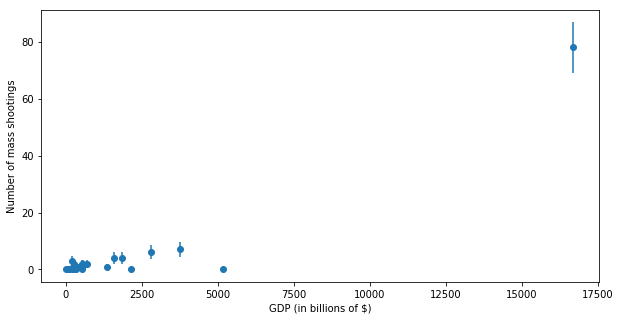

Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings


In [54]:
fig = pl.figure(figsize=(10,5))
ax = fig.add_subplot(111)

scatter = ax.scatter(df3['gpd 2013'] / 1e9, df3['#mass_shootings'])
ax.errorbar(df3['gpd 2013'] / 1e9, df3['#mass_shootings'], 
            yerr = np.sqrt(df3['#mass_shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions of $)")
ax.set_ylabel("Number of mass shootings")
ax.set_ylim()
pl.show()
print ("Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number of mass shootings")

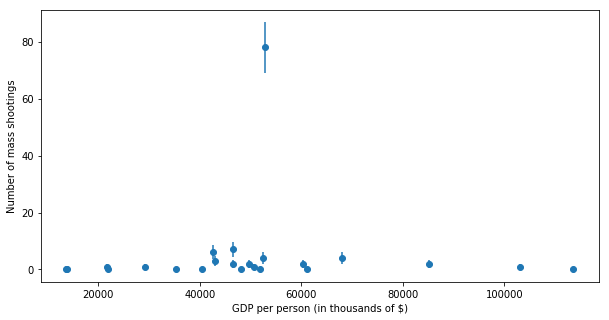

Number of mass shooting vs GDP per person, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings


In [61]:
fig = pl.figure(figsize=(10,5))
ax = fig.add_subplot(111)

scatter = ax.scatter(df3['gdp pp'], df3['#mass_shootings'])
ax.errorbar(df3['gdp pp'], df3['#mass_shootings'], 
            yerr = np.sqrt(df3['#mass_shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP per person (in thousands of $)")
ax.set_ylabel("Number of mass shootings")
ax.set_ylim()

pl.show()
print ("Number of mass shooting vs GDP per person, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number of mass shootings")

** plot the average number of civilian fire arms per person **

In [74]:
df3['shootingspp'] = df3["#mass_shootings"] / df3['pop_total']

Text(0,0.5,'Population (in millions of people)')

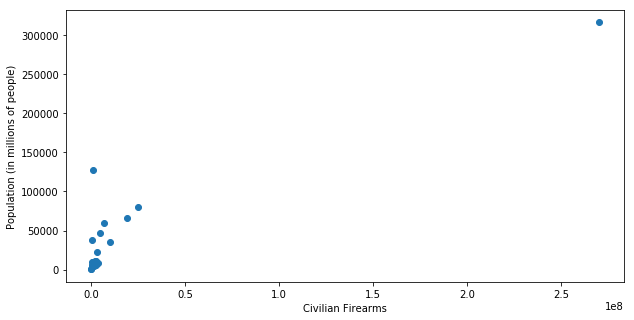

In [98]:

fig = pl.figure(figsize=(10,5))
ax = fig.add_subplot(111)

scatter = ax.scatter(df3['avg_firearms'],df3['pop_total']/ 1e6)

ax.set_xlabel("Civilian Firearms")
ax.set_ylabel("Population (in millions of people)")


Text(0,0.5,'Population (in millions of people)')

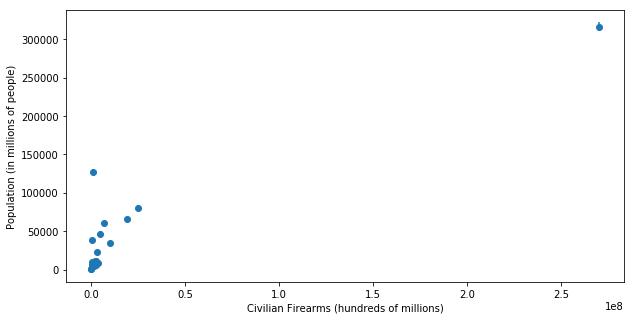

In [100]:
fig = pl.figure(figsize=(10,5))
ax = fig.add_subplot(111)

scatter = ax.scatter(df3['avg_firearms'],df3['pop_total'] / 1e6)
ax.errorbar(df3['avg_firearms'], df3['pop_total']/1e6, 
            yerr = (np.sqrt(df3['pop_total'] + df3['avg_firearms'])/1e6)*10000, fmt = '.')

ax.set_xlabel("Civilian Firearms (hundreds of millions)")
ax.set_ylabel("Population (in millions of people)")


## multiplied errors by 10000 -- for no reason other than to be able to see them

Error bars are too small to see on this graph. I've inflated them here * 10000, and still they are only large enough to see on the top right point. 

Top right point appears to be an outlier. Is it the US? :

In [88]:
print("Country with the most Civilian Firearms")
df3[df3.avg_firearms == df3.avg_firearms.max()]

Country with the most Civilian Firearms


,Country,Average total all civilian firearms,pop 2013,gpd 2013,Number of homicides by firearm,Guns per 100 inhabitants,Number of mass shootings (1983-2013),gdp_total,pop_total,gdp pp,#mass_shootings,shootingspp,avg_firearms
22,United States,270000000.0,316234505.0,1.669152e+13,9146.0,88.8,78,1.669152e+19,3.162345e+11,52782.086509,78,2.466524e-10,270000000.0


^^^ yup. 

** avg. number of homicides by firearms per person **

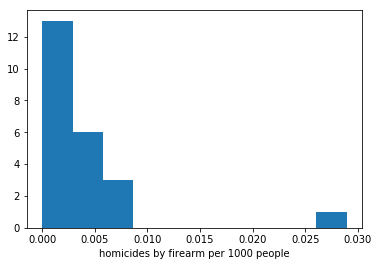

In [151]:
fig, ax = plt.subplots()
ax.hist(df3['Number of homicides by firearm'] / df3['pop 2013'] * 1000)
ax.set_xlabel('homicides by firearm per 1000 people');

There is an obvious outlier on the right of the chart that represents the US. 

Text(0,0.5,'Homicides by Firearm')

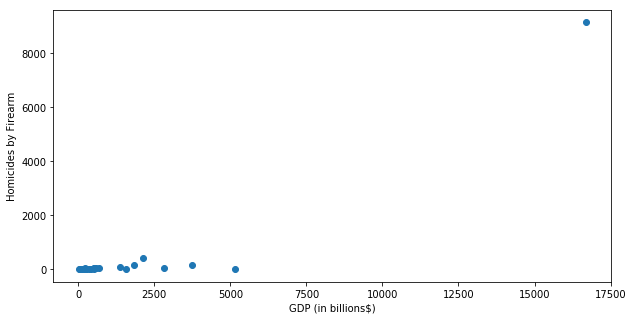

In [110]:
#homicide by firearm against GDP 

fig = pl.figure(figsize=(10,5))
ax = fig.add_subplot(111)

scatter = ax.scatter(df3['gpd 2013']/1e9 ,df3['Number of homicides by firearm']  )

ax.errorbar(df3['gpd 2013']/1e9, df3['Number of homicides by firearm'], 
            yerr = np.sqrt(df3['gpd 2013'] + df3['Number of homicides by firearm'])/1e9 , fmt = '.')

ax.set_xlabel("GDP (in billions$)")
ax.set_ylabel("Homicides by Firearm")


Text(0,0.5,'homicides by firearm per 1000 people')

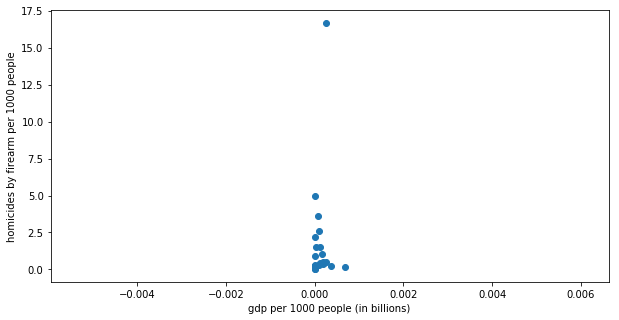

In [156]:
fig = pl.figure(figsize=(10,5))
ax = fig.add_subplot(111)

scatter = ax.scatter(df3['shootingspp'],(df3['gpd,ppp 2013']/1e9)/1000)

ax.set_xlabel('gdp per 1000 people (in billions)')
ax.set_ylabel('homicides by firearm per 1000 people')

#ax.set_ylim(ymin=0)

** number of homicides by firearm against the number of civilian firearms **

Text(0,0.5,'Number of homicides by firearm')

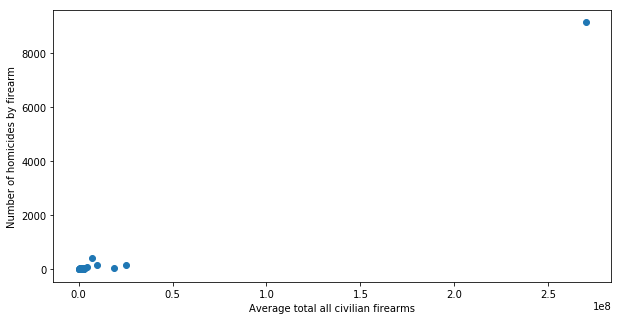

In [165]:
fig = pl.figure(figsize=(10,5))
ax = fig.add_subplot(111)

scatter = ax.scatter(df3['Average total all civilian firearms'],
                     df3['Number of homicides by firearm'])

ax.set_xlabel('Average total all civilian firearms')
ax.set_ylabel('Number of homicides by firearm')


Again, the US in the top right corner is a major outlier, having both the most firearms and the most homicides by firearm by far. 

Text(0,0.5,'Number of homicides by firearm')

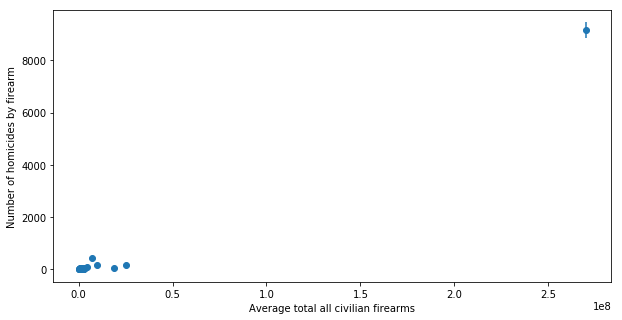

In [171]:
fig = pl.figure(figsize=(10,5))
ax = fig.add_subplot(111)

scatter = ax.scatter(df3['Average total all civilian firearms'],
                     df3['Number of homicides by firearm'])

ax.errorbar(df3['Average total all civilian firearms'], df3['Number of homicides by firearm'], 
            yerr = np.sqrt(df3['Number of homicides by firearm']*10), fmt = '.')

ax.set_xlabel('Average total all civilian firearms')
ax.set_ylabel('Number of homicides by firearm')

** number of mass shootings against the number of civilian firearms **

Text(0,0.5,'Number of mass shootings (1983-2013)')

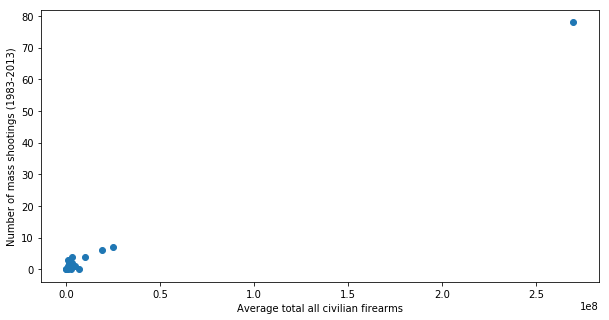

In [172]:
fig = pl.figure(figsize=(10,5))
ax = fig.add_subplot(111)

scatter = ax.scatter(df3['Average total all civilian firearms'],
                     df3["Number of mass shootings (1983-2013)"])

ax.set_xlabel('Average total all civilian firearms')
ax.set_ylabel("Number of mass shootings (1983-2013)")


Text(0,0.5,'Number of mass shootings (1983-2013)')

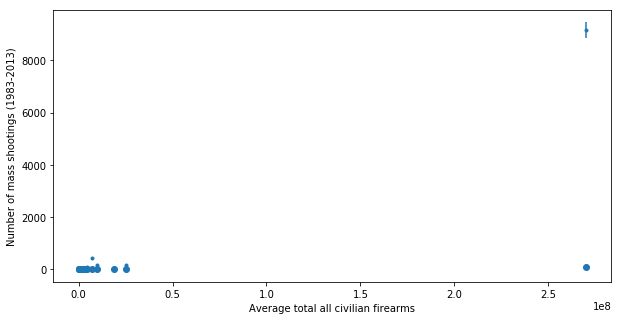

In [173]:
fig = pl.figure(figsize=(10,5))
ax = fig.add_subplot(111)

scatter = ax.scatter(df3['Average total all civilian firearms'],
                     df3["Number of mass shootings (1983-2013)"])

ax.errorbar(df3['Average total all civilian firearms'], df3['Number of homicides by firearm'], 
            yerr = np.sqrt(df3['Number of homicides by firearm']*10), fmt = '.')


ax.set_xlabel('Average total all civilian firearms')
ax.set_ylabel("Number of mass shootings (1983-2013)")

Again, the US is an outlier on the top right. Another outlier in terms of number of civillian firearms appears on the bottom left. 

** Modeling **

In [174]:
df3.describe()

,Average total all civilian firearms,pop 2013,"gpd,ppp 2013",Number of homicides by firearm,Guns per 100 inhabitants,Number of mass shootings (1983-2013),gdp pp,shootings pp,shootingspp
count,2.300000e+01,2.300000e+01,2.300000e+01,23.000000,23.000000,23.000000,23.000000,2.300000e+01,23.000000
mean,1.565543e+07,3.861960e+07,1.698955e+12,453.434783,23.786957,4.956522,44057.456531,1.226227e-07,0.000123
std,5.578880e+07,6.830168e+07,3.502131e+12,1897.064355,19.089581,16.046745,15398.230287,1.600733e-07,0.000160
min,7.000000e+04,3.237640e+05,1.386399e+10,0.000000,0.600000,0.000000,24463.199471,0.000000e+00,0.000000
25%,6.800000e+05,5.526952e+06,2.521923e+11,13.000000,11.150000,0.000000,36175.355903,0.000000e+00,0.000000
50%,2.400000e+06,1.045730e+07,4.384797e+11,30.000000,22.500000,1.000000,43519.777920,9.091094e-08,0.000091
75%,3.950000e+06,4.233012e+07,1.535133e+12,63.500000,31.000000,2.500000,47324.451221,1.878554e-07,0.000188
max,2.700000e+08,3.162345e+08,1.669152e+13,9146.000000,88.800000,78.000000,95590.538698,6.753563e-07,0.000675


In [175]:
df3['guns_small']=df3['Average total all civilian firearms']/1e7

In [181]:
newg = sm.add_constant(df3['guns_small'])

In [217]:
ols1 = smf.OLS(df3['shootingspp'], newg).fit()
ols1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            shootingspp   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                    0.5725
Date:                Tue, 13 Nov 2018   Prob (F-statistic):              0.458
Time:                        23:38:32   Log-Likelihood:                 169.20
No. Observations:                  23   AIC:                            -334.4
Df Residuals:                      21   BIC:                            -332.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001   3.51e-05      3.288      0.004    4.24e-05       0.000
guns_small  4.674e-06   6.18e-06      0.757      0.458   -8.17e-06    1.75e-05
==============================================================================
Omnibus:                       25.255   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.864
Skew:                           2.124   Prob(JB):                     1.34e-09
Kurtosis:                       7.959   Cond. No.                         5.92
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [214]:
x=df3['guns_small']/10
y=df3['shootingspp']/10
y2 =df3['Number of mass shootings (1983-2013)']/10

/Users/katharinevoorhees/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


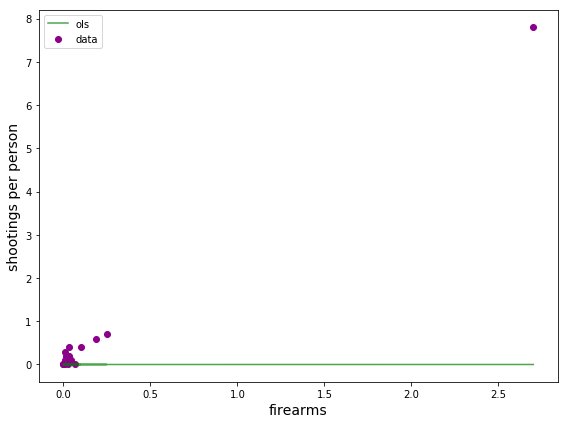

In [215]:
fig=pl.figure(figsize(8,6),tight_layout=True)
ax=pl.axes()


pl.scatter(x,y2, label= 'data', c='darkmagenta')
pl.plot(x,ols1.fittedvalues, color='g', alpha=.7, label='ols')


pl.xlabel('firearms',size=14)
pl.ylabel('shootings per person',size=14)

pl.title('')

pl.legend()

In [216]:

wls1 = smf.WLS(df3['shootingspp'], newg, weights=1/np.sqrt(x)).fit()
wls1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:            shootingspp   R-squared:                       0.006
Model:                            WLS   Adj. R-squared:                 -0.041
Method:                 Least Squares   F-statistic:                    0.1334
Date:                Tue, 13 Nov 2018   Prob (F-statistic):              0.719
Time:                        23:38:16   Log-Likelihood:                 164.76
No. Observations:                  23   AIC:                            -325.5
Df Residuals:                      21   BIC:                            -323.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.968e-05   3.48e-05      2.290      0.032    7.32e-06       0.000
guns_small  8.836e-06   2.42e-05      0.365      0.719   -4.15e-05    5.91e-05
==============================================================================
Omnibus:                       28.440   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.805
Skew:                           2.267   Prob(JB):                     7.62e-13
Kurtosis:                       9.138   Cond. No.                         1.49
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1]:
fig=pl.figure(figsize(8,6),tight_layout=True)
ax=pl.axes()


pl.scatter(x,y2, label= 'data', c='darkmagenta')
pl.plot(x,wls1.fittedvalues, color='b', alpha=.7, label='wls')


pl.xlabel('firearms',size=14)
pl.ylabel('shootings per person',size=14)

pl.title('')

#ax.set_xlim(xmin=0, xmax=.3)

pl.legend()

NameError: name 'pl' is not defined

xmax was set to .3 which excludes the outlier of the us but allows 